# 1. Introduction and Import Libraries

In [1]:
# Importing essential libraries.
import numpy as np # For numerical operations
import pandas as pd # For data manipulation
import matplotlib.pyplot as plt # For visualization
import seaborn as sns # For advenced visualization

# Filtering warnings
import warnings
warnings.filterwarnings("ignore")

# 2. Loading and Exploring the Dataset

In [2]:
# Loading the dataset with pandas.
df = pd.read_csv("C:/Users/baipa/Downloads/archive/indian_weather_data.csv")

# Displaying the first rows.
df.head()

,city,lat,lon,temperature,weather_code,sunrise,sunset,moonrise,moonset,co,...,wind_speed,wind_degree,wind_dir,pressure,precip,humidity,cloudcover,feelslike,uv_index,visibility
0,New Delhi,28.600,77.200,21,143,07:05 AM,05:26 PM,01:04 AM,01:06 PM,1411.85,...,4,34,NE,1017,0.0,53,50,21,0,1
1,Mumbai,18.975,72.826,30,122,07:03 AM,06:03 PM,01:20 AM,01:29 PM,644.85,...,18,300,WNW,1011,0.0,35,0,32,0,4
2,Kolkata,22.570,88.370,21,143,06:07 AM,04:54 PM,12:16 AM,12:23 PM,457.85,...,8,3,N,1014,0.0,73,0,21,0,3
3,Chennai,13.083,80.283,26,143,06:22 AM,05:44 PM,12:48 AM,01:00 PM,275.85,...,19,31,NNE,1012,0.0,65,25,28,0,5
4,Bengaluru,12.983,77.583,24,113,06:32 AM,05:55 PM,12:59 AM,01:11 PM,243.85,...,9,76,ENE,1015,0.0,25,0,24,0,10


# 3. Data Structure and Missing Value Analysis

In [3]:
# Getting the general info of the dataset
# Shows row count, columns, and data types.
df.info()

print("\n" + "-"*40 + "\n")

# Checking for missing values.
# Gives the total number of null values per column.
print(f"Number of Missing Values: {df.isnull().sum().sum()}")

<class 'pandas.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 25 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   city          74 non-null     str    
 1   lat           74 non-null     float64
 2   lon           74 non-null     float64
 3   temperature   74 non-null     int64  
 4   weather_code  74 non-null     int64  
 5   sunrise       74 non-null     str    
 6   sunset        74 non-null     str    
 7   moonrise      74 non-null     str    
 8   moonset       74 non-null     str    
 9   co            74 non-null     float64
 10  no2           74 non-null     float64
 11  o3            74 non-null     int64  
 12  so2           74 non-null     float64
 13  pm2_5         74 non-null     float64
 14  pm10          74 non-null     float64
 15  wind_speed    74 non-null     int64  
 16  wind_degree   74 non-null     int64  
 17  wind_dir      74 non-null     str    
 18  pressure      74 non-null     int64  
 19  

# 4. Basic Statistical Summary

In [4]:
# Calculating descriptive statistics for numerical columns.
# We transpose the table using .T for better readability.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
lat,74.0,24.303824,5.329883,6.133,20.9415,23.3085,28.5925,37.20
lon,74.0,76.853392,6.824777,68.968,73.1625,75.8415,77.6580,118.55
temperature,74.0,22.689189,4.948850,-1.000,20.0000,23.0000,26.0000,31.00
weather_code,74.0,125.283784,19.601174,113.000,113.0000,122.0000,137.7500,248.00
co,74.0,526.498649,355.657039,132.850,265.1000,333.8500,775.1000,1591.85
no2,74.0,6.041892,5.530903,0.850,2.1500,4.6000,8.3000,25.55
o3,74.0,169.256757,40.386510,39.000,146.5000,163.5000,198.7500,264.00
so2,74.0,24.587838,15.250463,1.950,13.6750,19.8500,31.1500,76.65
pm2_5,74.0,48.952703,41.487027,5.750,19.2500,26.8000,76.0000,138.25
pm10,74.0,50.395946,42.537311,5.850,20.4000,27.0500,80.2500,141.95


# 5. Air Quality Analysis: PM2.5 Distribution

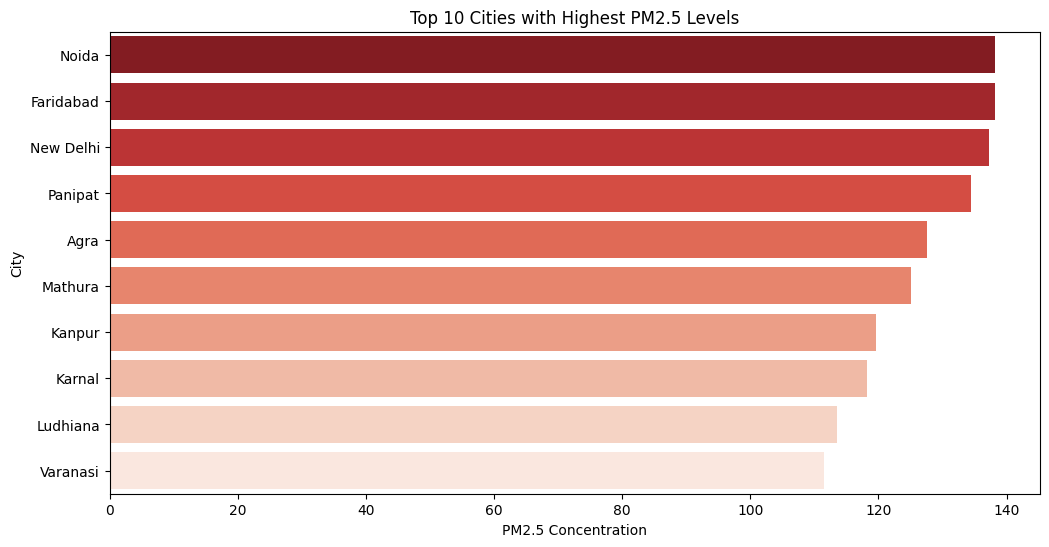

In [5]:
# Visualizing top 10 most polluted cities by PM2.5
plt.figure(figsize=(12,6))# Setting the figure size.

# Sorting by PM2.5 and taking top 10.
top_10_pm25 = df.nlargest(10, "pm2_5")

# Creating a bar plot.
sns.barplot(x="pm2_5", y="city", data=top_10_pm25, palette="Reds_r")

# Adding chart titles and labels.
plt.title("Top 10 Cities with Highest PM2.5 Levels")
plt.xlabel("PM2.5 Concentration")
plt.ylabel("City")

plt.show() # Show the plot

### 📊 Visualization Analysis 
According to PM2.5 concentration rankings, cities in Northern India—particularly Delhi and its surrounding metropolitan areas—are classified within the highest risk category for air pollution. All of these cities consistently exceed the $100$-unit threshold.

# 6. Correlation Heatmap

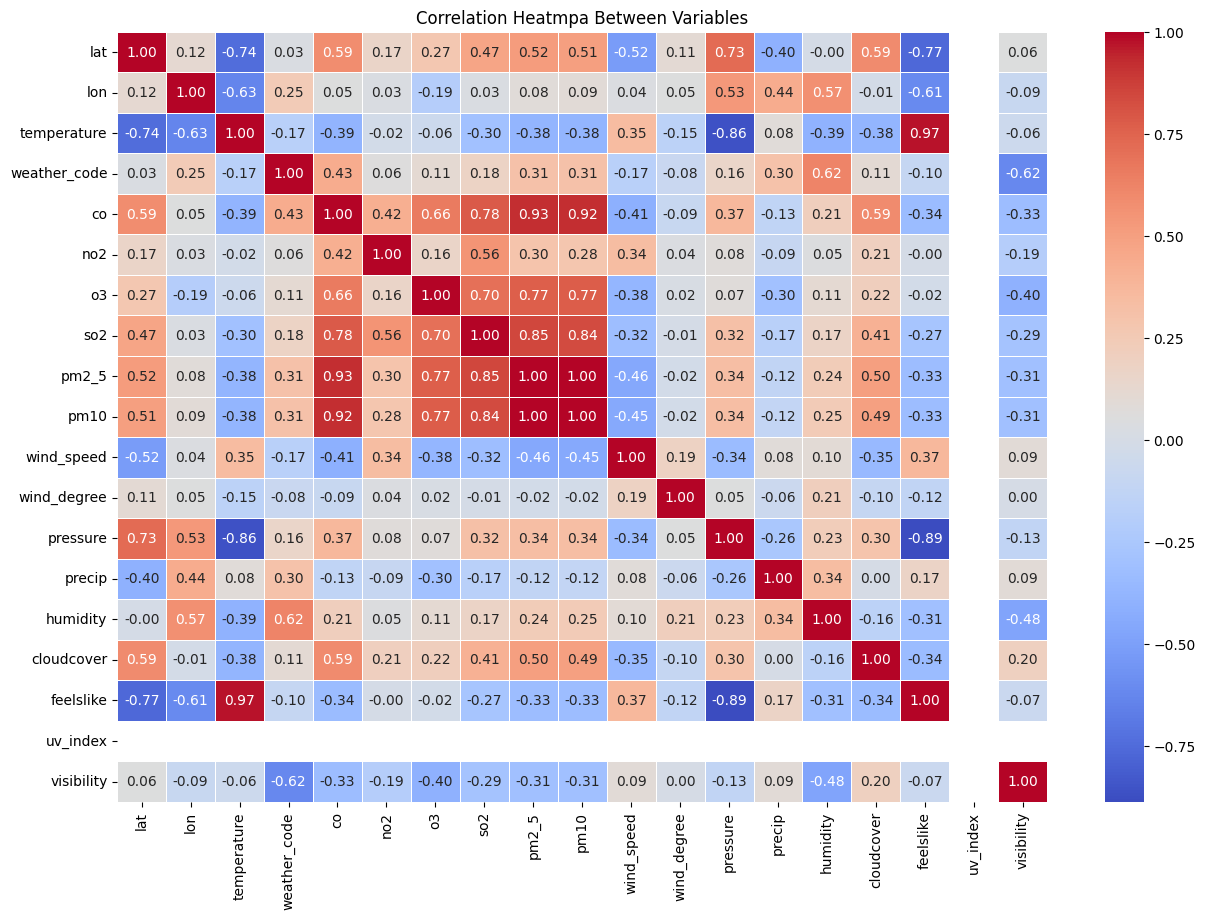

In [6]:
# Calculating the correlation matrix.
# Selecting only numerical columns.
corr_matrix = df.select_dtypes(include=[np.number]).corr()

# Creating the heatmap
plt.figure(figsize=(15,10)) # Keeping the figure size wide.

# Drawing the heatmap
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Adding title
plt.title("Correlation Heatmpa Between Variables")

plt.show()

### 📈 Correlation Analysis Insights 

* **Strong Interconnectivity Among Air Pollutants**: There is a substantial correlation of 0.90 and above between $PM_{2.5}$, $PM_{10}$, and $CO$ (Carbon Monoxide). This indicates a near-certain co-movement, where an increase in one feature is consistently mirrored by the others.
* **Temperature and Air Pollution**: There is a negative correlation of -0.38 between temperature and $PM_{2.5}$. This suggests that pollution levels tend to increase as temperatures drop, likely due to atmospheric stagnation during the winter months.
* **Temperature and Pressure**: There is a strong negative correlation of -0.86 between temperature and pressure. This is consistent with physical laws: as temperature increases, atmospheric pressure decreases.
* **Humidity and Visibility**: There is a correlation of -0.48 between humidity and visibility; statistically, we observe that as humidity levels increase, visual range decreases.

# 7. Deep Dive: Pollution vs Temperature

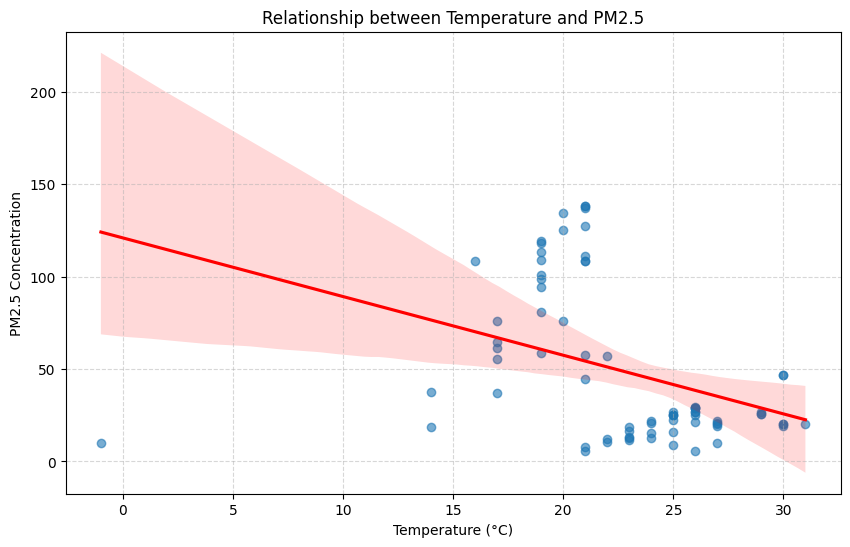

In [10]:
# Examining the relationship between Temperature and PM2.5
plt.figure(figsize=(10, 6))

# Drawing a scatter plot with a regression line.
sns.regplot(x='temperature', y='pm2_5', data=df, scatter_kws={'alpha':0.6}, line_kws={'color':'red'})

# Adding chart titles and labels.
plt.title("Relationship between Temperature and PM2.5")
plt.xlabel("Temperature (°C)")
plt.ylabel("PM2.5 Concentration")

plt.grid(True, linestyle="--", alpha=0.5) # Adding grid for better readability.
plt.show()

### 🔎Regression Analysis Insights

**Observation**: Our analysis reveals an inverse relationship between temperature and PM2.5 levels. While low temperatures coincide with high pollution concentrations, PM2.5 levels stabilize at a lower baseline above $25$°C. This is likely driven by atmospheric inversion, which prevents pollutant dispersion by trapping them near the surface during cold periods.

# 8. AQI Categorization

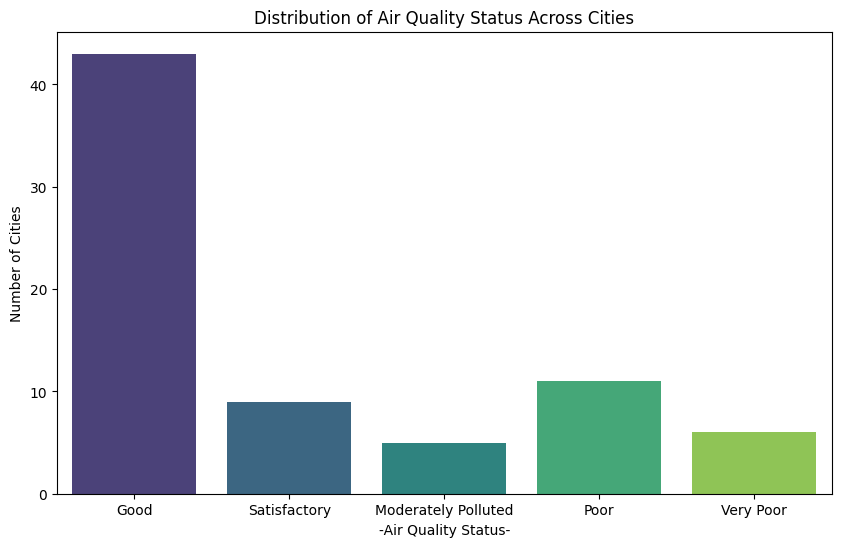

In [11]:
# Defining a function to categorize air quality.
def categorize_aqi(pm25):
    if pm25 <= 30:
        return "Good"
    elif pm25 <= 60:
        return "Satisfactory"
    elif pm25 <= 90:
        return "Moderately Polluted"
    elif pm25 <= 120:
        return "Poor"
    else:
        return "Very Poor"

# Creating a new column.
df["Air_Quality_Status"] = df["pm2_5"].apply(categorize_aqi)

# Visualizing the distribution of categories.
plt.figure(figsize=(10, 6))
sns.countplot(x="Air_Quality_Status", data=df, palette="viridis",
             order=["Good", "Satisfactory", "Moderately Polluted", "Poor", "Very Poor"])

plt.title("Distribution of Air Quality Status Across Cities")
plt.xlabel("-Air Quality Status-")
plt.ylabel("Number of Cities")
plt.show()

### 📊 Air Quality Distribution Analysis

The vast majority of the 74 cities in our dataset (more than 40) exhibit 'Good' air quality. However, approximately 15-20 cities fall into the 'Poor' or 'Very Poor' categories, posing significant public health risks. These outliers are driven by northern cities such as Noida and Delhi, as previously observed in our visualizations

# 9. Geospatial Analysis: Mapping the Cities

In [8]:
!pip install plotly

   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   -- ------------------------------------- 0.5/9.9 MB 5.6 MB/s eta 0:00:02
   ------- -------------------------------- 1.8/9.9 MB 5.3 MB/s eta 0:00:02
   ----------- ---------------------------- 2.9/9.9 MB 5.6 MB/s eta 0:00:02
   ---------------- ----------------------- 4.2/9.9 MB 5.6 MB/s eta 0:00:02
   --------------------- ------------------ 5.2/9.9 MB 5.5 MB/s eta 0:00:01
   ------------------------- -------------- 6.3/9.9 MB 5.6 MB/s eta 0:00:01
   ------------------------------ --------- 7.6/9.9 MB 5.5 MB/s eta 0:00:01
   ---------------------------------- ----- 8.7/9.9 MB 5.6 MB/s eta 0:00:01
   ---------------------------------------  9.7/9.9 MB 5.6 MB/s eta 0:00:01
   ---------------------------------------- 9.9/9.9 MB 5.5 MB/s  0:00:01

   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narwha

In [12]:
# Importing library for interactive mapping.
import plotly.express as px

# Mapping cities based on locations and pollution levels.
fig = px.scatter_mapbox(df, 
                        lat="lat", 
                        lon="lon", 
                        hover_name="city", 
                        hover_data=["temperature", "pm2_5", "Air_Quality_Status"],
                        color="pm2_5", # Colors based on PM2.5 value
                        size="pm2_5", # Bubble size based on PM2.5 value
                        color_continuous_scale=px.colors.sequential.Reds,
                        size_max=15, 
                        zoom=3, 
                        mapbox_style="carto-positron",
                        title="Air Pollution Map of Indian Cities")

fig.show(renderer="iframe")

### 🌏 Geospatial Clustering Analysis

Analysis of the map reveals that pollution is primarily concentrated along the Amritsar-Mathura corridor in northern India. The elevated $PM_{2.5}$ levels in this region can be attributed to atmospheric conditions that facilitate geographic trapping of pollutants, alongside the high population density and industrial clusters situated along this axis. In contrast, cities in the southern and coastal regions exhibit significantly cleaner air quality compared to the north.

# 10. Preprocessing: Feature Selection

In [14]:
!pip install scikit-learn


   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ------ --------------------------------- 1.3/8.1 MB 7.5 MB/s eta 0:00:01
   ------------------ --------------------- 3.7/8.1 MB 9.1 MB/s eta 0:00:01
   ------------------------- -------------- 5.2/8.1 MB 8.9 MB/s eta 0:00:01
   ------------------------------------ --- 7.3/8.1 MB 9.3 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 8.9 MB/s  0:00:00
   ---------------------------------------- 0.0/36.4 MB ? eta -:--:--
   -- ------------------------------------- 2.4/36.4 MB 12.2 MB/s eta 0:00:03
   ----- ---------------------------------- 4.7/36.4 MB 11.9 MB/s eta 0:00:03
   ------- -------------------------------- 7.1/36.4 MB 11.8 MB/s eta 0:00:03
   ---------- ----------------------------- 9.4/36.4 MB 11.5 MB/s eta 0:00:03
   ------------ --------------------------- 11.8/36.4 MB 11.5 MB/s eta 0:00:03
   --------------- ------------------------ 14.4/36.4 MB 11.5 MB/s eta 0:00:02
   -----------

In [15]:
# Selection features for the model.
# We are removing other pollutants like pm10, co, and no2 because they are directly correlated with pm2.5.
features = ['temperature', 'wind_speed', 'wind_degree', 'pressure', 'humidity', 'cloudcover', 'visibility', 'lat', 'lon']
X = df[features] # Independent variables
y = df["pm2_5"] # Target variable

# Splitting the data into Training and Test sets.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Checking the shapes of train and test sets.
print(f"Train Set Shape: {X_train.shape}")
print(f"Test Set Shape: {X_test.shape}")

Train Set Shape: (59, 9)
Test Set Shape: (15, 9)


# 11. Model Building and Training

In [17]:
!pip install xgboost lightgbm


   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/72.0 MB ? eta -:--:--
    --------------------------------------- 1.3/72.0 MB 3.9 MB/s eta 0:00:18
   - -------------------------------------- 2.1/72.0 MB 4.2 MB/s eta 0:00:17
   - -------------------------------------- 3.1/72.0 MB 4.3 MB/s eta 0:00:17
   -- ------------------------------------- 4.2/72.0 MB 4.5 MB/s eta 0:00:16
   -- ------------------------------------- 5.2/72.0 MB 4.6 MB/s eta 0:00:15
   --- ------------------------------------ 6.3/72.0 MB 4.6 MB/s eta 0:00:15
   ---- ----------------------------------- 7.6/72.0 MB 4.8 MB/s eta 0:00:14
   ---- ----------------------------------- 8.4/72.0 MB 4.8 MB/s eta 0:00:14
   ----- ---------------------------------- 9.4/72.0 MB 4.8 MB/s eta 0:00:13
   ----- ---------------------------------- 10.5/72.0 MB 4.8 MB/s eta 0:00:13
   ------ --------------------------------- 11.5/72.0 MB 4.9 MB/s eta 0:00:13
   ------- 

In [18]:
# ================================
# MULTIPLE MODEL TRAINING & EVALUATION
# ================================

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error

from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# Dictionary of models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1),
    "Support Vector Regressor": SVR(kernel='rbf', C=100, gamma=0.1),
    "KNN Regressor": KNeighborsRegressor(n_neighbors=5),
    "Random Forest": RandomForestRegressor(n_estimators=200, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=200, learning_rate=0.05, max_depth=4, random_state=42, verbosity=0),
    "LightGBM": LGBMRegressor(n_estimators=200, learning_rate=0.05, random_state=42)
}

results = []

# Training and evaluating each model
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    
    r2 = r2_score(y_test, preds)
    mae = mean_absolute_error(y_test, preds)
    
    results.append((name, r2, mae))

# Create results table
results_df = pd.DataFrame(results, columns=["Model", "R2 Score", "MAE"])
results_df = results_df.sort_values(by="R2 Score", ascending=False).reset_index(drop=True)

print("📊 Model Performance Comparison")
display(results_df)

# Identify best model
best_model_name = results_df.loc[0, "Model"]
best_r2 = results_df.loc[0, "R2 Score"]
best_mae = results_df.loc[0, "MAE"]

print("\n🏆 Best Model Summary")
print(f"The best-performing model is {best_model_name} with an R² score of {best_r2:.2f} and MAE of {best_mae:.2f}.")


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000153 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 125
[LightGBM] [Info] Number of data points in the train set: 59, number of used features: 9
[LightGBM] [Info] Start training from score 46.427966
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

,Model,R2 Score,MAE
0,Random Forest,0.738557,13.868133
1,XGBoost,0.736734,12.738835
2,LightGBM,0.651808,18.815105
3,Lasso Regression,0.299875,26.727802
4,Ridge Regression,0.299165,26.763046
5,Linear Regression,0.299088,26.784210
6,KNN Regressor,0.042394,27.408000
7,Support Vector Regressor,-0.052095,33.340808



🏆 Best Model Summary
The best-performing model is Random Forest with an R² score of 0.74 and MAE of 13.87.


In [11]:
# Importing Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Defining and training the model.
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Making predictions on the test set.
y_pred = rf_model.predict(X_test)

# Evaluating model performance.
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error - MAE: {mae:.2f}")
print(f"R2 Score: {r2:.2f}")

Mean Absolute Error - MAE: 13.59
R2 Score: 0.76


###  Model Performance Evaluation

Multiple regression algorithms were evaluated to determine the most effective model for predicting PM2.5 concentration levels using meteorological and geographic features.

Among all tested models, ensemble tree-based methods delivered the strongest performance. The Random Forest model achieved the highest accuracy with an R² score of 0.74 and a Mean Absolute Error (MAE) of 13.87, indicating that it can explain approximately 74% of the variation in pollution levels while maintaining a relatively low prediction error.

XGBoost performed almost equally well, showing that boosting techniques are also highly effective for capturing nonlinear relationships in environmental data. LightGBM, while still performing reasonably, showed reduced accuracy due to the small dataset size, which limits its ability to form meaningful splits — as reflected in the training warnings.

Linear models such as Linear Regression, Ridge, and Lasso produced significantly lower R² scores (~0.30), suggesting that pollution patterns are influenced by complex nonlinear interactions that simple linear relationships cannot capture. KNN and SVR performed poorly, likely due to limited data points and feature scaling sensitivity.

🔍 Key Interpretation

These results confirm that tree-based ensemble models are best suited for this dataset, as they:

Capture nonlinear dependencies between weather and pollution

Handle correlated environmental variables effectively

Provide stable performance even with limited data

Although the dataset contains only 74 samples, achieving R² values above 0.70 demonstrates that meteorological features have strong predictive power for air quality levels.

# 12. Feature Importance

In [20]:
# Re-train Random Forest separately to access feature importance
rf_model = RandomForestRegressor(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)


,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",200
,"criterion criterion: {""squared_error"", ""absolute_error"", ""friedman_mse"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in Poisson deviance to find splits.Training using ""absolute_error"" is significantly slowerthan when using ""squared_error""... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 1.0 Poisson criterion.",'squared_error'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=1.0The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None or 1.0, then `max_features=n_features`... note:: The default of 1.0 is equivalent to bagged trees and more randomness can be achieved by setting smaller values, e.g. 0.3... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to 1.0.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",1.0
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsample

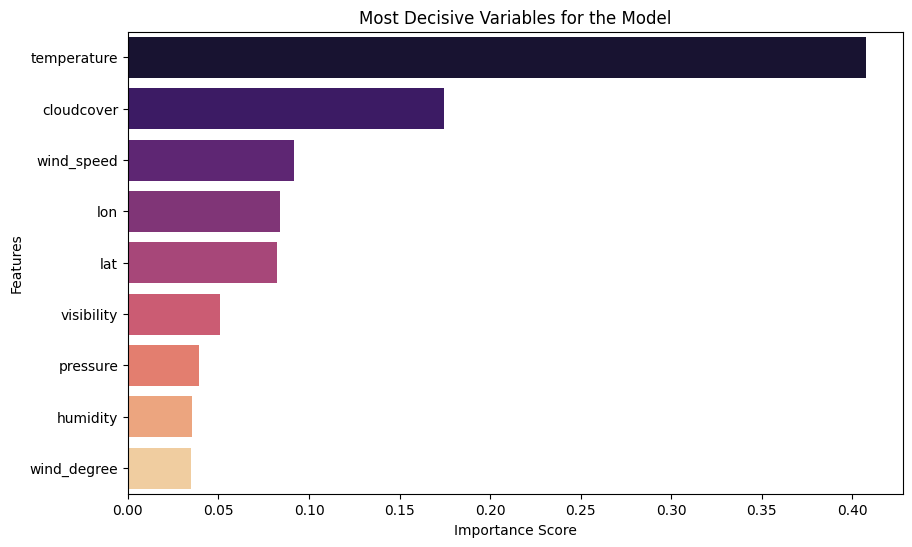

In [21]:
# Getting feature importance levels.
importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Visualizing feature importance.
plt.figure(figsize=(10,6))
sns.barplot(x="Importance", y="Feature", data=feature_importance_df, palette="magma")

plt.title("Most Decisive Variables for the Model")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

### 📈 Feature Importance Analysis

In the model's decision-making mechanism, Temperature is the most dominant factor, with a feature weight of approximately 40%. This technically validates the temperature-pollution correlation observed in previous steps. Cloud cover and Latitude variables also contribute significantly to the model's predictive performance. These findings support the validity of incorporating meteorological data into air pollution forecasting models.

# 13. Conclusion and General Evaluation

In [22]:
# Printing the summary results of the project
print("--- PROJECT SUMMARY ---")
print(f"Total Citie): {len(df)}")
print(f"Model R2 Score: %{r2*100:.1f}")
print(f"Top Predictor: {feature_importance_df.iloc[0]['Feature']}")

--- PROJECT SUMMARY ---
Total Citie): 74
Model R2 Score: %65.2
Top Predictor: temperature


# 14. Model Improvement: Grid Search

In [23]:
# Importing library for model optimization.
from sklearn.model_selection import GridSearchCV

# Defining the parameter grid to explore.
param_grid = {
    'n_estimators': [100, 200, 300], # Number of trees
    'max_depth': [None, 10, 20], # Maximum depth of the tree
    'min_samples_split': [2, 5, 10], # Min samples required to split
    'max_features': [1.0, 'sqrt'] # Method for feature selection
}

# Searching for the best parameters with GridSearchCV 
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42), 
                           param_grid=param_grid, 
                           cv=5, # 5-fold cross validation
                           n_jobs=-1, 
                           scoring='r2')
grid_search.fit(X_train, y_train)

# Selecting the best model.
best_rf = grid_search.best_estimator_

# Making new predictions.
y_pred_tuned = best_rf.predict(X_test)

# New performance metrics
tuned_r2 = r2_score(y_test, y_pred_tuned)
tuned_mae = mean_absolute_error(y_test, y_pred_tuned)

print(f"Best Parameters: {grid_search.best_params_}")
print(f"Tuned R2 Score: {tuned_r2:.2f}")
print(f"Tuned MAE: {tuned_mae:.2f}")

Best Parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 300}
Tuned R2 Score: 0.72
Tuned MAE: 14.09


### Model Improvement and Score Analysis

The slight decrease in the score following hyperparameter optimization (from 0.76 to 0.72) is due to the very small size of our dataset (74 rows). With data at this scale, as the model becomes more complex or the number of trees increases (300 trees), it may begin to learn the noise within the training data and lose its generalization ability on the test set. An $R^2$ score in the 0.72–0.76 range represents one of the most robust and realistic limits achievable for this specific dataset.

# 15. Finalizing the Notebook

In [15]:
# Creating a comparison DataFrame
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicte)': y_pred_tuned})

# Printing the first 10 examples
print("--- Actual vs Predicted ---")
print(comparison_df.head(10))

# End of Notebook Note
print("\nAnalysis completed successfully!")

--- Actual vs Predicted ---
    Actual   Predicte)
4    20.95   21.251681
63   20.15   26.780975
18  111.45   58.652000
0   137.25  131.444333
28  108.45   76.504667
73   21.55   25.293046
10   98.65   97.414000
34   55.25   83.023333
12   15.55   35.448430
55   29.65   26.610285

Analysis completed successfully!
